In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from keras import Input, Model, layers
#from keras import Model
from keras.layers.core import Dense
from tensorflow.keras.datasets import mnist

In [2]:
# load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training dataset shape: ' + str(x_train.shape))
print('Testing dataset shape: ' + str(x_test.shape))

Training dataset shape: (60000, 28, 28)
Testing dataset shape: (10000, 28, 28)


In [3]:
# normalize all values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


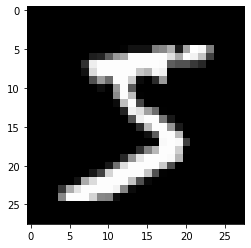

In [4]:
plt.imshow(x_train[0], cmap='gray')

In [5]:
# flatten the data to a single vector
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))
print('Training dataset shape: ' + str(x_train.shape))
print('Testing dataset shape: ' + str(x_test.shape))

Training dataset shape: (60000, 784)
Testing dataset shape: (10000, 784)


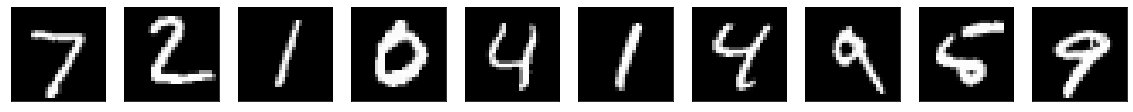

In [6]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  # display the original images
  ax = plt.subplot(1, n, i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display the decoded images

Encoder

In [16]:
# the size of our input
original_dim = x_train.shape[1]

# the input placeholder
input_img = Input(shape=(original_dim,), name='input_layer')


# encoder
# hidden layer size 256, use Dense function with ReLU activation 
h = Dense(256, activation='relu')(input_img)

h = Dense(128, activation='relu')(h)


# encode the input with dense layer size 2, relu
encoded = Dense(2, activation='relu')(h)
# ------------------------------------------------------------------------------
# decoder
latent_inputs = Input(shape=(2,), name='latent_input')

h = Dense(128, activation='relu')(latent_inputs)
# hidden dense layer of size 256
h = Dense(256, activation='relu')(h)

# output layer, dense layer of size original_dim, sigmoid activation function
outputs = Dense(original_dim, activation='sigmoid')(h)


# instantiate encoder model
deepAE_encoder = Model(input_img, encoded, name='encoder')

# instantiate decoder model
deepAE_decoder = Model(latent_inputs, outputs, name='decoder')

# instantiate deep AE model
outputs = deepAE_decoder(deepAE_encoder(input_img))
deepAE = Model(input_img, outputs, name='deep_ae')


deepAE.compile(optimizer='adam', loss='mse')

deepAE.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True,
           validation_data=(x_test, x_test))

encoded_imgs = deepAE_encoder.predict(x_test, batch_size=128)
decoded_imgs = deepAE_decoder.predict(encoded_imgs)

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0688 - val_loss: 0.0615
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0601 - val_loss: 0.0585
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0572 - val_loss: 0.0560
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0551 - val_loss: 0.0542
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0536 - val_loss: 0.0531
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0527 - val_loss: 0.0523
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0519 - val_loss: 0.0518
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0513 - val_loss: 0.0509
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0508 - val_loss: 0.0504
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0501 - val_loss: 0.0497

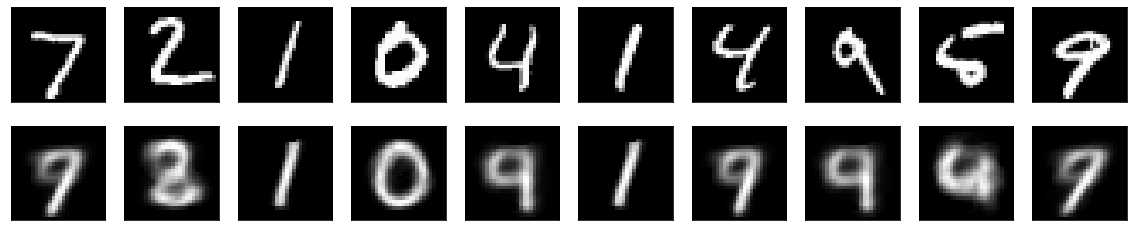

In [17]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  # display the original images
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display the decoded images
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)